# Business Problem:To predict whether the person's liver is Functioning properly or not using given features. 

In [1]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('liver.csv') #reading the data

In [3]:
data

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/R,Output,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,NaN,NaN,NaN,NaN
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,NaN,NaN,NaN,NaN
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,NaN,NaN,NaN,NaN
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,NaN,NaN,NaN,NaN
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2,NaN,NaN,NaN,NaN
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1,NaN,NaN,NaN,NaN
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1,NaN,NaN,NaN,NaN
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1,NaN,NaN,NaN,NaN


In [4]:
data.drop(['Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14'],axis=1,inplace=True)

In [5]:
data.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/R,Output
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Details
1. Age: Age of the patient
2. Female: Gender of the patient (1 if Female, 0 if Male)
3. TB: Total Bilirubin
4. DB: Direct Bilirubin
5. Alkphos: Alkaline Phosphotase
6. Sgpt: Alamine Aminotransferase
7. Sgot: Aspartate Aminotransferase
8. TP: Total Protiens
9. ALB: Albumin
10. A/R: Albumin and Globulin Ratio
11. Output: Target(1-Normal Functioning, 2-Abnormal Functioning)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      583 non-null    int64  
 1   Gender   583 non-null    object 
 2   TB       583 non-null    float64
 3   DB       583 non-null    float64
 4   Alkphos  583 non-null    int64  
 5   Sgpt     583 non-null    int64  
 6   Sgot     583 non-null    int64  
 7   TP       583 non-null    float64
 8   ALB      583 non-null    float64
 9   A/R      579 non-null    float64
 10  Output   583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
data.describe()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/R,Output
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [8]:
data.isnull().sum()

Age        0
Gender     0
TB         0
DB         0
Alkphos    0
Sgpt       0
Sgot       0
TP         0
ALB        0
A/R        4
Output     0
dtype: int64

In [9]:
data.dropna(inplace = True) #Dropping null values as it is less than 5% of the data.

In [10]:
data.isnull().sum()

Age        0
Gender     0
TB         0
DB         0
Alkphos    0
Sgpt       0
Sgot       0
TP         0
ALB        0
A/R        0
Output     0
dtype: int64

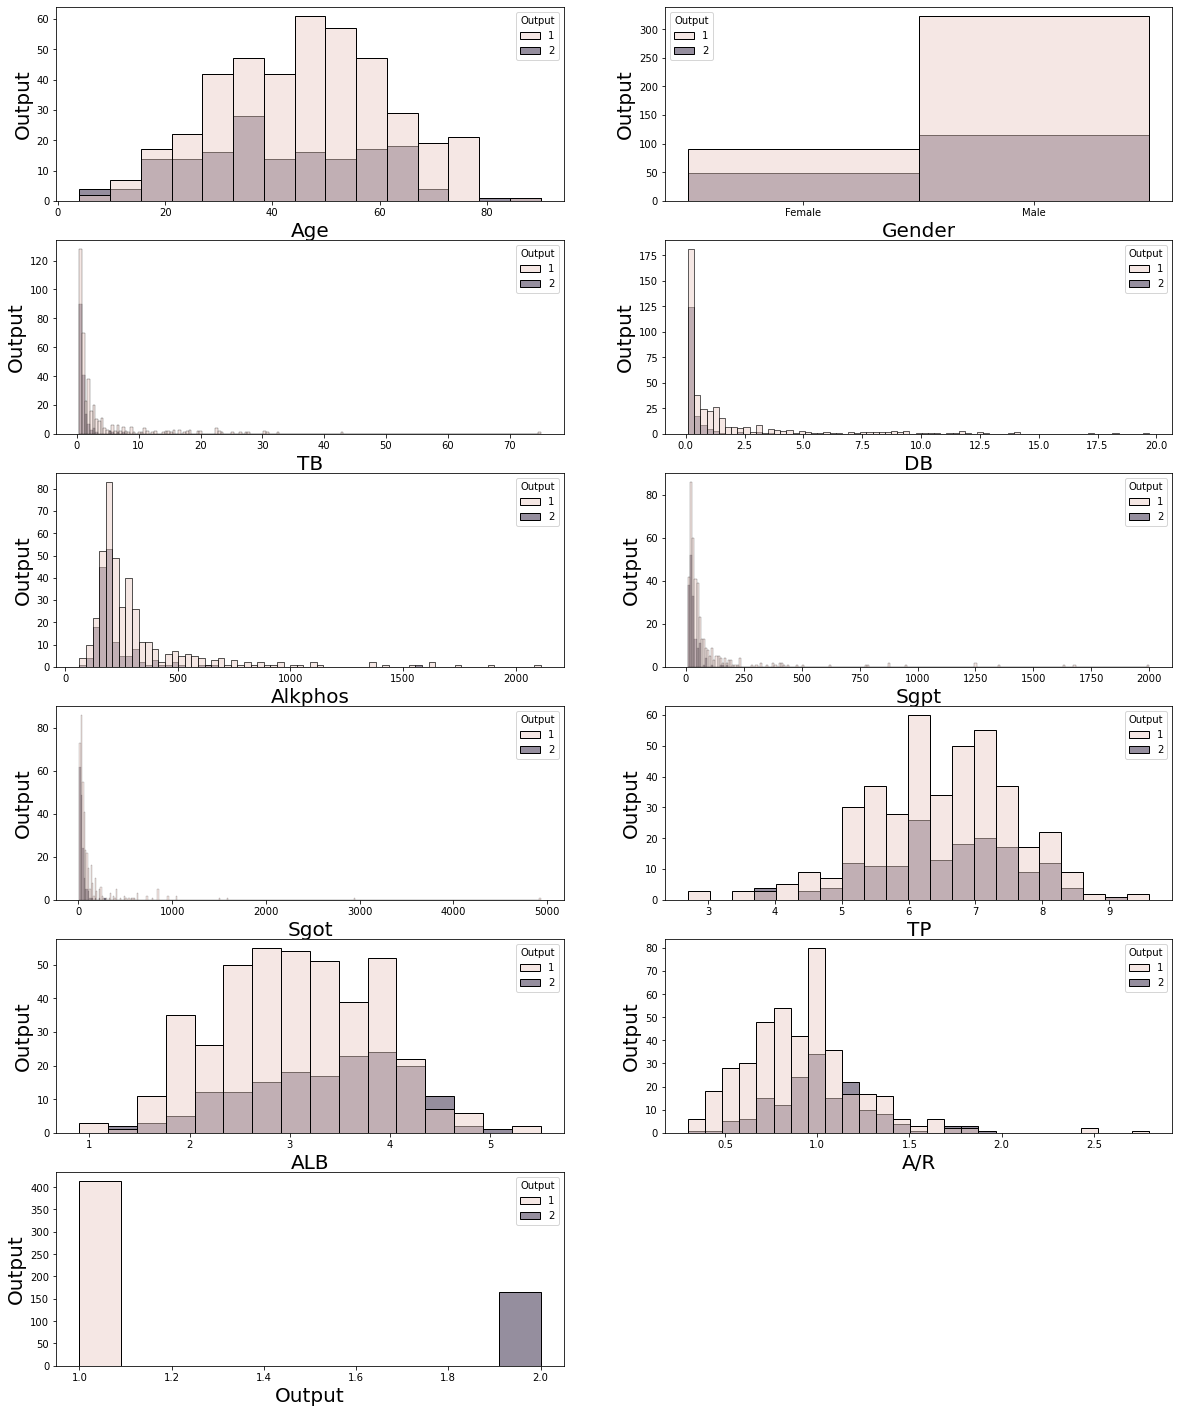

In [11]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=12 : # as there are 11 columns in the dataset.
        ax = plt.subplot(6,2,plotnumber)
        sns.histplot(x=data[column],hue=data.Output)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Output',fontsize=20)
    plotnumber+=1
plt.show()

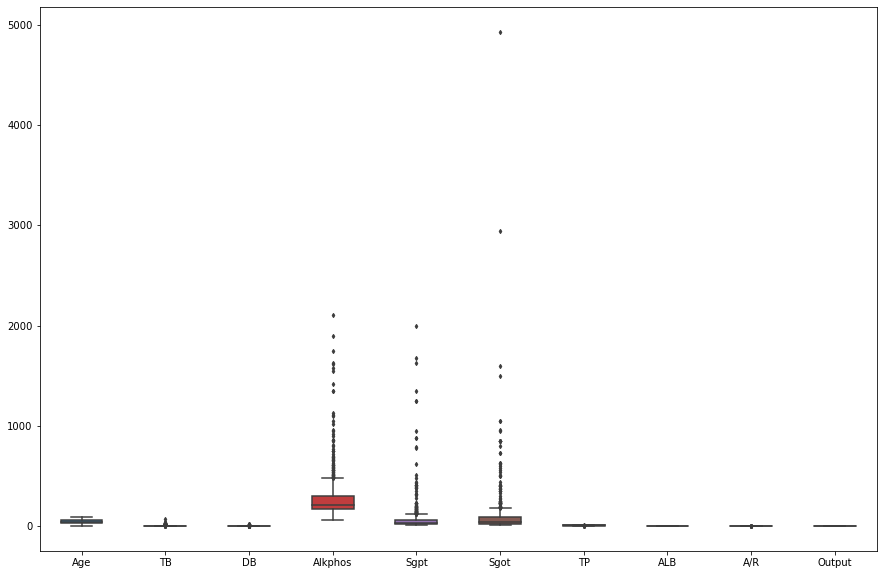

In [12]:
## checking outliers
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width=0.5,ax=ax, fliersize=3)
plt.show()

In [13]:
data.shape

(579, 11)

In [14]:
# As we can see there are outliers in some features.
# We have to remove those outliers so that our model will work properly.

In [15]:
# Outleir treatment in TB using IQR method
Q1= data.TB.quantile(0.25)
Q3= data.TB.quantile(0.75)
IQR = Q3-Q1
lower_limit=Q1 - 1.5*IQR
upper_limit=Q3 + 1.5*IQR
lower_limit,upper_limit

(-1.9000000000000001, 5.300000000000001)

In [16]:
data=data[(data.TB<upper_limit) & (data.TB>lower_limit)]

In [17]:
data.shape

(495, 11)

In [18]:
#outleir treatment in Alkphos.
upper_limit = data.Alkphos.mean() + 3*data.Alkphos.std()
lower_limit = data.Alkphos.mean() - 3*data.Alkphos.std()
data[(data.Alkphos>upper_limit) | (data.Alkphos<lower_limit)]

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/R,Output
77,68,Female,0.6,0.1,1620,95,127,4.6,2.1,0.80,1
80,58,Female,2.4,1.1,915,60,142,4.7,1.8,0.60,1
116,48,Male,0.7,0.1,1630,74,149,5.3,2.0,0.60,1
128,58,Female,1.7,0.8,1896,61,83,8.0,3.9,0.95,1
195,60,Male,2.4,1.0,1124,30,54,5.2,1.9,0.50,1
233,33,Male,2.0,1.4,2110,48,89,6.2,3.0,0.90,1
256,50,Male,0.9,0.3,901,23,17,6.2,3.5,1.20,1
429,73,Male,1.9,0.7,1750,102,141,5.5,2.0,0.50,1
452,58,Male,0.9,0.2,1100,25,36,7.1,3.5,0.90,1


In [19]:
data=data[(data.Alkphos<upper_limit) & (data.Alkphos>lower_limit)]

In [20]:
#outleir treatment in Sgpt.
Q1= data.Sgpt.quantile(0.25)
Q3= data.Sgpt.quantile(0.75)
IQR = Q3-Q1
lower_limit=Q1 - 1.5*IQR
upper_limit=Q3 + 1.5*IQR
data[(data.Sgpt>upper_limit) | (data.Sgpt<lower_limit)]

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/R,Output
16,38,Male,1.8,0.8,342,168,441,7.6,4.4,1.30,1
18,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
35,30,Male,1.3,0.4,482,102,80,6.9,3.3,0.90,1
39,47,Male,2.7,1.3,275,123,73,6.2,3.3,1.10,1
43,50,Male,2.6,1.2,415,407,576,6.4,3.2,1.00,1
47,40,Male,1.1,0.3,230,1630,960,4.9,2.8,1.30,1
70,19,Female,0.7,0.2,186,166,397,5.5,3.0,1.20,1


In [21]:
data=data[(data.Sgpt<upper_limit) & (data.Sgpt>lower_limit)]

In [22]:
#outleir treatment in Sgot.
Q1= data.Sgot.quantile(0.25)
Q3= data.Sgot.quantile(0.75)
IQR = Q3-Q1
lower_limit=Q1 - 1.5*IQR
upper_limit=Q3 + 1.5*IQR
data[(data.Sgot>upper_limit) | (data.Sgot<lower_limit)]

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/R,Output
30,57,Male,4.0,1.9,190,45,111,5.2,1.5,0.40,1
41,62,Male,0.6,0.1,160,42,110,4.9,2.6,1.10,2
45,35,Male,1.8,0.6,275,48,178,6.5,3.2,0.90,2
52,38,Male,3.1,1.6,253,80,406,6.8,3.9,1.30,1
53,38,Male,1.1,0.3,198,86,150,6.3,3.5,1.20,1
111,48,Male,3.2,1.6,257,33,116,5.7,2.2,0.62,1
137,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.80,1
138,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.80,1
142,30,Male,1.6,0.4,332,84,139,5.6,2.7,0.90,1
143,30,Male,1.6,0.4,332,84,139,5.6,2.7,0.90,1


In [23]:
data=data[(data.Sgot<upper_limit) & (data.Sgot>lower_limit)]

In [24]:
data.rename(columns ={'A/R':'AR'}, inplace=True)

In [25]:
data.shape

(402, 11)

# Model Creation

In [26]:
## defining x and y and creating dependent and independent variables
x=data.drop(columns = ['Output']) ## independent varable
y= data['Output'] ## dependent or target variable

In [27]:
data = pd.get_dummies(data, columns = ['Gender'])

In [28]:
data.columns

Index(['Age', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'AR',
       'Output', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['Age', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'AR']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

In [30]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(data[columns_to_scale],y, test_size= 0.25,random_state=355)

# Logistic Regression

In [31]:
## model creation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [32]:
## testing of a model
y_pred1 = log_reg.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           1       0.73      0.91      0.81        67
           2       0.65      0.32      0.43        34

    accuracy                           0.71       101
   macro avg       0.69      0.62      0.62       101
weighted avg       0.70      0.71      0.68       101



# KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
## taking optimal k how many clusters to create
error_rate = []
# Will take some time
for i in range(1,12):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

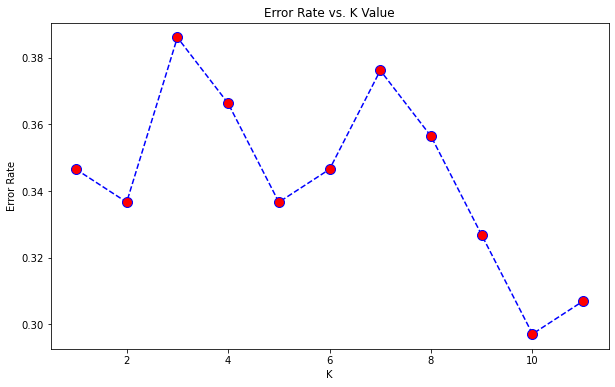

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,12),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [36]:
# let's fit the data into kNN model and see how well it performs:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [37]:
y_pred2 = knn.predict(x_test)

In [38]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           1       0.73      0.88      0.80        67
           2       0.60      0.35      0.44        34

    accuracy                           0.70       101
   macro avg       0.66      0.62      0.62       101
weighted avg       0.69      0.70      0.68       101



# Xgboost

In [39]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

[20:29:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
y_pred3 = xgb.predict(x_test)

In [41]:
xgb_tr = xgb.score(x_train,y_train)*100
xgb_ts = xgb.score(x_test,y_test)*100
print("train_accuracy:", xgb_tr,"____","test_accuracy: ", xgb_ts)

train_accuracy: 100.0 ____ test_accuracy:  64.35643564356435


In [42]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           1       0.71      0.78      0.74        67
           2       0.46      0.38      0.42        34

    accuracy                           0.64       101
   macro avg       0.59      0.58      0.58       101
weighted avg       0.63      0.64      0.63       101



# Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [44]:
y_pred4 = dtc.predict(x_test)

In [45]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           1       0.68      0.67      0.68        67
           2       0.37      0.38      0.38        34

    accuracy                           0.57       101
   macro avg       0.53      0.53      0.53       101
weighted avg       0.58      0.57      0.58       101



# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [48]:
y_pred5=rf_clf.predict(x_test)

In [49]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           1       0.73      0.79      0.76        67
           2       0.50      0.41      0.45        34

    accuracy                           0.66       101
   macro avg       0.61      0.60      0.60       101
weighted avg       0.65      0.66      0.65       101



# SVC

In [50]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(x_train,y_train)
y_pred7 = svc.predict(x_test)

In [51]:
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           1       0.67      0.99      0.80        67
           2       0.50      0.03      0.06        34

    accuracy                           0.66       101
   macro avg       0.58      0.51      0.43       101
weighted avg       0.61      0.66      0.55       101



# Conclusion: From Logistic Regression we are getting highest Accuracy.